<a href="https://colab.research.google.com/github/hindia-vic/Kmeans_clustering/blob/main/kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
df= pd.read_csv('/content/sample_data/force2020_data_unsupervised_learning.csv')
df.index=df['DEPTH_MD']
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
DEPTH_MD,,,,,,
494.528,1.884186,80.200851,494.528,NaN,20.915468,161.131180
494.680,1.889794,79.262886,494.680,NaN,19.383013,160.603470
494.832,1.896523,74.821999,494.832,NaN,22.591518,160.173615
494.984,1.891913,72.878922,494.984,NaN,32.191910,160.149429
495.136,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18270 entries, 494.528 to 3272.024000000001
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 999.1 KB


In [17]:
df.dropna(inplace=True)
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
DEPTH_MD,,,,,,
1138.704,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677
1138.856,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431
1139.008,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331
1139.160,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914
1139.312,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085


In [18]:
df.shape

(12202, 6)

In [19]:
scaler= StandardScaler()
df[['RHOB_T','GR_T','PEF_T','NPHI_T','DTC_T']]= scaler.fit_transform(df[['RHOB','GR','PEF','NPHI','DTC']])
df.head()


,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,PEF_T,NPHI_T,DTC_T
DEPTH_MD,,,,,,,,,,,
1138.704,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.255364,2.523654,0.869531
1138.856,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.247886,2.770744,0.690042
1139.008,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.247450,2.524300,0.554350
1139.160,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.261572,2.068584,0.585297
1139.312,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.325067,1.617342,0.752808


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

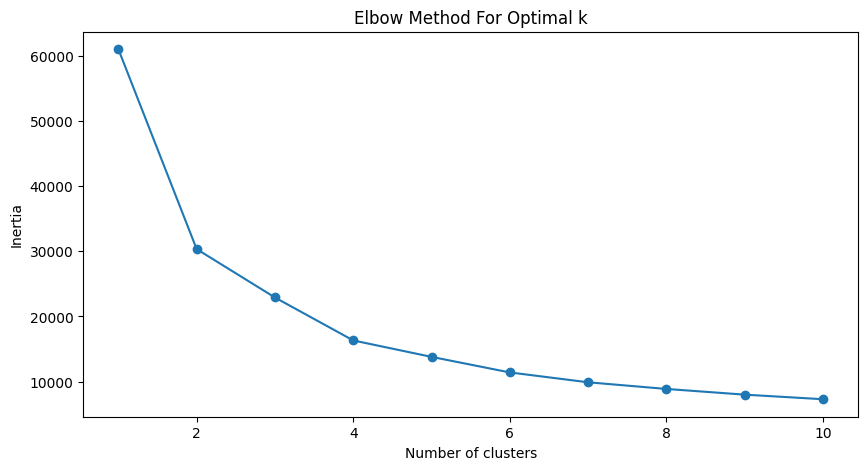

In [25]:


def optimizer_kmeans(data, max_k):
    means = []
    inertia = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        means.append(k)
        inertia.append(kmeans.inertia_)

    # Plotting the results
    fig = plt.figure(figsize=(10, 5))
    plt.plot(means, inertia, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    return means, inertia

# Assuming df is your DataFrame and it contains the specified columns
means, inertia = optimizer_kmeans(df[['RHOB_T', 'GR_T', 'PEF_T', 'NPHI_T', 'DTC_T']], 10)


In [26]:
kmeans= KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['RHOB_T', 'GR_T', 'PEF_T', 'NPHI_T', 'DTC_T']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [27]:
df['kmeans']=kmeans.labels_
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,RHOB_T,GR_T,PEF_T,NPHI_T,DTC_T,kmeans
DEPTH_MD,,,,,,,,,,,,
1138.704,1.774626,55.892757,1138.704,0.765867,1.631495,147.837677,-1.491843,-0.179292,-1.255364,2.523654,0.869531,2
1138.856,1.800986,60.929138,1138.856,0.800262,1.645080,142.382431,-1.387067,-0.010859,-1.247886,2.770744,0.690042,2
1139.008,1.817696,62.117264,1139.008,0.765957,1.645873,138.258331,-1.320646,0.028875,-1.247450,2.524300,0.554350,2
1139.160,1.829333,61.010860,1139.160,0.702521,1.620216,139.198914,-1.274390,-0.008126,-1.261572,2.068584,0.585297,2
1139.312,1.813854,58.501236,1139.312,0.639708,1.504854,144.290085,-1.335919,-0.092056,-1.325067,1.617342,0.752808,2


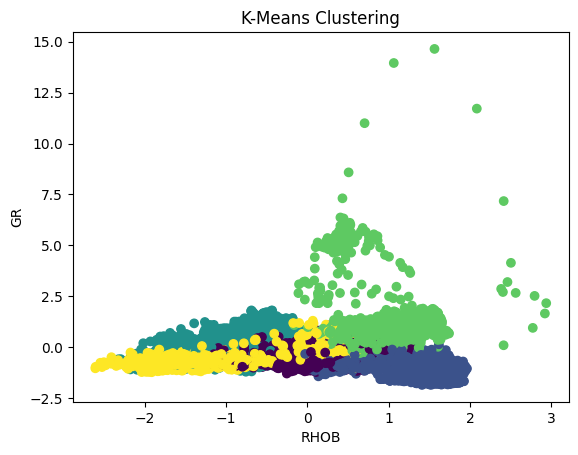

In [31]:
plt.scatter(df['RHOB_T'], df['GR_T'], c=df['kmeans'])
plt.xlabel('RHOB')
plt.ylabel('GR')
plt.title('K-Means Clustering')
plt.show()